<a href="https://colab.research.google.com/github/heet9022/Guess-The-Genre/blob/master/Genre_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# ! unzip -q 'drive/My Drive/Colab_datasets/poster/Multi_Label_dataset.zip' -d 'drive/My Drive/Colab_datasets/poster';

In [8]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [ ]:
!pip install "torch==1.4" "torchvision==0.5.0"; 

In [1]:
import fastai
from fastai import *
from fastai.vision import *
from fastai.callbacks.hooks import *

In [2]:
root_path = Path('drive/My Drive/Colab_datasets/poster/Multi_Label_dataset')
root_path.ls()

[PosixPath('drive/My Drive/Colab_datasets/poster/Multi_Label_dataset/train.csv'),
 PosixPath('drive/My Drive/Colab_datasets/poster/Multi_Label_dataset/Images'),
 PosixPath('drive/My Drive/Colab_datasets/poster/Multi_Label_dataset/new_labels.csv'),
 PosixPath('drive/My Drive/Colab_datasets/poster/Multi_Label_dataset/models')]

In [43]:
len((root_path/'Images').ls())

7867

In [51]:
# def clean(x): return x.replace('[', ' ').replace(']', ' ').replace("'", "").replace(',', '').strip()
# df['Genre'] = df['Genre'].apply(clean)

In [3]:
df = pd.read_csv(root_path/'new_labels.csv')
df.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,Comedy Drama,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,Drama Romance Music,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,Comedy,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,Sci-Fi Thriller,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,Action Adventure Thriller,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [5]:
len(df)

7244

In [4]:
np.random.seed(42)
src = (ImageList.from_csv(root_path,'new_labels.csv', cols=0, folder='Images', suffix='.jpg')
       .split_by_rand_pct(0.2)
       .label_from_df(cols=1, label_delim=' '))

In [5]:
data = (src.transform(get_transforms(do_flip=False), size=128)
        .databunch().normalize(imagenet_stats))

In [77]:
data.classes

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Thriller',
 'War',
 'Western']

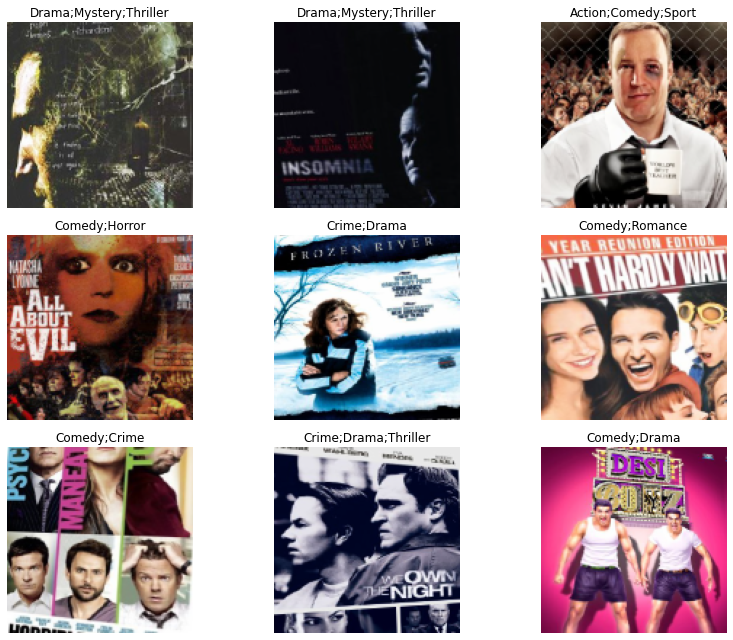

In [6]:
data.show_batch(rows=3, figsize=(12,9))

In [78]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)
learn = cnn_learner(data, models.resnet34, metrics=[acc_02, f_score])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


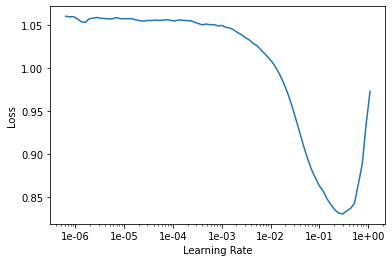

In [8]:
learn.lr_find()
learn.recorder.plot()

In [9]:
lr = 1e-02

In [10]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,time
0,0.553100,0.258110,0.907977,10:08
1,0.304227,0.237890,0.909732,01:21
2,0.254605,0.230383,0.912580,01:20
3,0.235546,0.223227,0.914911,01:25
4,0.224153,0.221612,0.915400,01:24


In [14]:
learn.save('stage-1-res34')

In [79]:
learn.load('stage-1-res34');

In [80]:
learn.unfreeze()

In [81]:
learn.fit_one_cycle(5, slice(1e-3, lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.231556,0.297297,0.868813,0.517069,01:22
1,0.233932,0.254212,0.866022,0.487380,01:23
2,0.228524,0.225776,0.871921,0.550590,01:23
3,0.218045,0.220524,0.884669,0.556831,01:23
4,0.200838,0.218666,0.883028,0.570123,01:23


In [82]:
learn.save('stage-2-res34');

### Go Big !

In [83]:
data = (src.transform(get_transforms(do_flip=False), size=256)
        .databunch().normalize(imagenet_stats))

In [89]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)
learn = cnn_learner(data, models.resnet34, metrics=[acc_02, f_score])

In [90]:
learn.load('stage-2-res34');

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


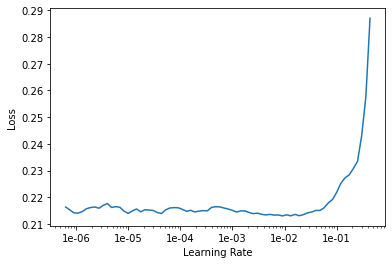

In [91]:
learn.lr_find()
learn.recorder.plot()

In [92]:
lr = 1e-02

In [93]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.215272,0.225751,0.877705,0.557990,01:43
1,0.217140,0.217312,0.882510,0.576747,01:43
2,0.212401,0.215803,0.886280,0.575288,01:43
3,0.205081,0.213886,0.886222,0.585560,01:43
4,0.200125,0.212355,0.887575,0.586397,01:41


In [95]:
learn.save('stage-1-res34-big');

In [97]:
learn.unfreeze();

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


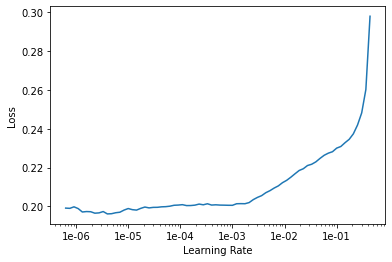

In [98]:
learn.lr_find()
learn.recorder.plot()

In [99]:
lr = 1e-03

In [100]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.201097,0.214132,0.886798,0.579453,01:46
1,0.199032,0.213549,0.884208,0.580434,01:45
2,0.190451,0.215745,0.886050,0.577672,01:43
3,0.180414,0.217947,0.887863,0.572371,01:43
4,0.171277,0.219819,0.885791,0.568860,01:45


In [139]:
learn.save('stage-2-res34-big');

In [134]:
img = open_image('avatar.jpg')
preds = learn.predict(img)

In [135]:
thresh = 0.2
labelled_preds = [' '.join([learn.data.classes[i] for i,p in enumerate(preds[2]) if p > thresh])]
labelled_preds

['Action Adventure Drama Fantasy']

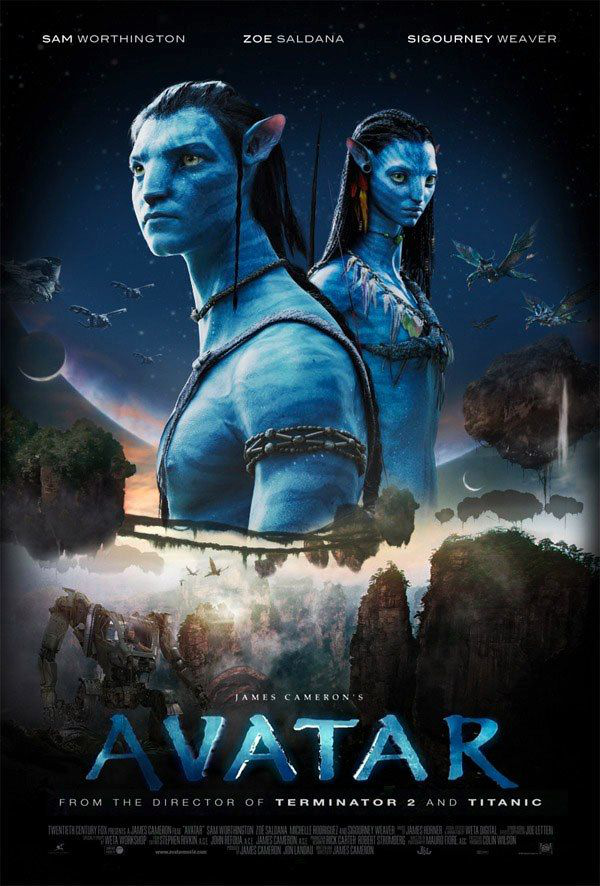

In [136]:
img

In [137]:
img = open_image('golmaal.jpg')
preds = learn.predict(img)
thresh = 0.2
labelled_preds = [' '.join([learn.data.classes[i] for i,p in enumerate(preds[2]) if p > thresh])]
labelled_preds

['Comedy Drama Romance']

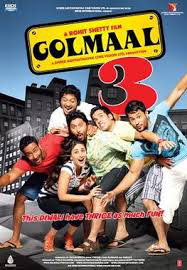

In [138]:
img